# Data analysis of TMDB
Ih this task I am going to do some data analysis of movies and tv shows that are in The Movie DataBase.
The insights I am going to find is the following:
- What directors have made most movies and/or tv-shows.
- What actors have been the most active.
- What genres was the most popular per decade.

## Getting the data

I was at first going to just use [TMDB's API](https://developer.themoviedb.org/reference/intro/getting-started), but I encountered a problem. When I was trying to call for the 501th page (i.e. pages 500+) it gave me a error with the text `Invalid page: Pages start at 1 and max at 500. They are expected to be an integer.`, this is quite annoying since the amount of pages as today (16 01 2025) is a whoping `48184`. And with the page limit I would only be able to access **just a bit over 1%** using this method. I did then discover the [daily ID](https://developer.themoviedb.org/docs/daily-id-exports) lists that they have. This was pretty sweet, but sadly i stumbled upon a me problem this time, my code was not good enough and I did not know how to improve it further, a aproximatly 190 hours of processing time to find directors from just the `People` list? Not acceptable, I then went for something a bit easier, I found this lovely [.csv file](https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates) that user Alan Vourc'h had uploaded to Kaggle, and that file is what I am goign to use for this project.

## Start of code
I am going to use Python as my coding language, since it is what I am the most comfortable with.

The very first thing I do is choose my modules for my code:
- I chose `pandas` as my module of choice to handle the .csv file.
- I chose `numpy` for its usefull math library.
- I chose `seaborn` for its posibility to visualize data in a friendly way.
- I chose `matplotlib.pyplot` for making graphing possible.
- I chose `ipywidgets` for making the graphs interactive.
- I chose `date` from `datetime` for removing movies that have not been released yet.
- I chose `Counter` from `collections` to go over how often a genre shows up.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from collections import Counter

Then since the file itself has many columns that I do not need, I made a list for them, and put that list in to the `usecols` parametre in panas' `read_csv`.

In [2]:

fields = ["title","id","popularity","vote_average","vote_count","release_date","revenue","budget","runtime","genres","cast","director","writers","producers","imdb_rating","imdb_votes"] # Put the info you want here

df = pd.read_csv(r"Data\TMDB_all_movies.csv", skipinitialspace=True, usecols=fields)

Then, since there are some rows that had `NAN` as their values, i changed those to a 0 where it was fitting. (I did not do this for the movies with no credits, they are filtered out.) 
I also set the index to be the movies ID.

In [3]:
#Data cleaning START
df.set_index("id", inplace=True) #Sets the index to be the movies ID

for i in ["vote_average","vote_count","revenue","budget","imdb_rating","imdb_votes"]:
    df[i].fillna(0,inplace=True)
    #This replaces NAN values with in the list to 0


df["release_date"] = pd.to_datetime(df["release_date"]) #Turns the dates in to the date format

today = pd.to_datetime(date.today())
df = df[df["release_date"] <= today] #This removes movies that are in the dataset that are not out yet.

df.drop_duplicates(inplace = True)

df.dropna(inplace=True)
#Data cleaning END

C:\Users\Bruker\AppData\Local\Temp\ipykernel_2360\175845122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(0,inplace=True)


## The First Question

So to find out who has directed the most movies, and how many movies they have directed I do a quick query on the `director` collumn.

In [4]:
df["director"].describe(include="object")

count             226033
unique            106938
top       David DeCoteau
freq                 142
Name: director, dtype: object

And here I look at the `top` in the terminal to find out that it is David DeCoteau that has directed the most movies, and by looking at `freq` that he has directed 142 movies.

## The Second Question

Now to find the person whom has acted in the most movies, this is found in a very similar way to the first question, but now I will use the collumn `cast`.

In [5]:
df["cast"].describe(include="object")

count        226033
unique       223456
top       Mel Blanc
freq            139
Name: cast, dtype: object

And it is Mel Blanc that has played in the most movies, in 139 of them.

## The Third Question

Now to find out what genres are the most popular per decade, I first divide up each movie in to the decades that they are in.

In [6]:
df["decade"] = (df["release_date"].dt.year // 10) * 10

I then run a `df.head()` to make sure that the new collumn `decade` has been added.

In [7]:
df.head()

,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,genres,cast,director,writers,producers,imdb_rating,imdb_votes,decade
id,,,,,,,,,,,,,,,,
2,Ariel,7.100,338.0,1988-10-21,0.0,73.0,0.0,12.553,"Comedy, Drama, Romance, Crime","Jyrki Olsonen, Jaakko Talaskivi, Olli Varja, H...",Aki Kaurismäki,Aki Kaurismäki,Aki Kaurismäki,7.4,8892.0,1980
3,Shadows in Paradise,7.300,402.0,1986-10-17,0.0,74.0,0.0,16.411,"Comedy, Drama, Romance","Sirkka Silin, Helmeri Pellonpää, Tanja Talaski...",Aki Kaurismäki,Aki Kaurismäki,Mika Kaurismäki,7.5,7681.0,1980
5,Four Rooms,5.900,2650.0,1995-12-09,4257354.0,98.0,4000000.0,19.476,Comedy,"Lili Taylor, Valeria Golino, Marisa Tomei, Mar...","Quentin Tarantino, Robert Rodriguez, Allison A...","Quentin Tarantino, Robert Rodriguez, Allison A...","Quentin Tarantino, Lawrence Bender, Alexandre ...",6.7,113177.0,1990
6,Judgment Night,6.500,333.0,1993-10-15,12136938.0,109.0,21000000.0,12.110,"Action, Crime, Thriller","Stephen Dorff, Everlast, Will Zahrn, Emilio Es...",Stephen Hopkins,"Jere Cunningham, Lewis Colick","Gene Levy, Marilyn Vance, Lloyd Segan",6.6,19493.0,1990
9,Sunday in August,7.135,26.0,2004-09-02,0.0,15.0,0.0,2.729,Drama,"Rita Lengyel, Milton Welsh","Marc Meyer, Anna Haas",Marc Meyer,Marc Meyer,6.8,14.0,2000


And it has!
I will now gothrough each movie and find its genres, I am going to test a few diffrent aproaches for this:
1. I will tally up the genres for each movie, so if a movie is a `drama` & `comedy` movie that was released in the decade `1980`, the decade `1980` will have `1 drama movie` "point" and `1 comedy movie` "point"
2. I will do similar as in 1., but instead each movie will count as a fraction (`1/n` where `n` is the amount of genres that movie has). So the same movie in method 1. the decade `1980` will have `0.5 drama movie` "points" and `0.5 comedy movie` "points".
3. Similar as to 1., but this time the `popularity` collumn will play in, if the movie in method 1. has a `popularity` score of `10` the decade `1980` will have `10 drama movie` "points" and `10 comedy movie` "points".
4. Similar as to 3, but this time based on method 2., so it will divide the popularity on the amount of genres. So then the decade `1980` will have `5 drama movie` "points" and `5 comedy movie` "points".

I wanted to do this with multiple different aproaches, the first and third might give a slightly "bloated" feeling when it comes to genres, since a movie rarely has only one genre. Therfore I made the second and fourth aproaches. And for the first and second aproach versus third and fourth aproach, I thought it would be interesting to see if the most common genres per dacade was the most popular ones

I start with finding out all the diffrent decades in the data set.

In [25]:
print(type(df["decade"].unique()))

<class 'numpy.ndarray'>


Now with the diffrent decades, i go through each movie in the list, starting with the earliest decade. I then use the `pandas.explode()` to get a copy of each genre per movie by itself. Then I use `Counter` to count how many induvidual times each genre shows up, add it to a dictionary, and then go on to the next decade. I repeat this untuil there are no more decades.

In [23]:
def count_genres_once_per_movie() -> dict:
    """
    Goes through each movie in the data frame, going decade by decade, starting with the earliest decade.
    Then it splits up each genre in to its own "copy" of the movie with with `.explode()`.
    It then with `Counter()` it counts all the genres and how many times they showed up in that decade.
    Then it adds the value for each genre, the value is the amount of times a movie has that genre.
    Then it goes to the next decade.
    returns:
        dict: a dict of each decade, and its popularity
    """
    
    genre_popularity_per_decade = {}
    
    for decade in sorted(df["decade"].unique()):
        temporary_df = df[df["decade"] == decade]
        #I first use the pandas .explode() method to get each genre for itself
        all_genres_that_decade = temporary_df["genres"].str.split(", ").explode()
        genre_count = Counter(all_genres_that_decade)
        sorted_genres = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True)) #Makes it so that each genre in the decade dicts are sorted with the most often at the top.

        genre_popularity_per_decade[int(decade)] = dict(sorted_genres)

        
    return genre_popularity_per_decade    

def count_genres_weighted_by_count() -> dict:
    """Goes through each movie in the data frame, then for each movie, it gets its genres, and logs how many genres that movie id had.
    Then it splits up each genre in to its own "copy" of the movie with with `.explode()`.
    It then with `Counter()` it counts all the genres and how many times they showed up in that decade.
    Then it adds the value for each genre, the value is the amount of times a movie has that genre, divided on how many genres that movie had.
    Then it goes to the next decade.

    returns:
        dict: a dict of each decade, and its popularity
    """
    
    genre_popularity_per_decade = {}
    
    for decade in sorted(df["decade"].unique()):
        temporary_df = df[df["decade"] == decade]
        
        genre_weights = Counter()
        
        for genres in temporary_df["genres"]:
            genre_list = genres.split(", ")
            weight = 1 / len(genre_list)
            
            
            for genre in genre_list:
                genre_weights[genre] += weight
            
        rounded_weights = {genre: round(weight, 2) for genre, weight in genre_weights.items()} #Makes it so that each genre in the finished dict is rounded, if i rounded it in the loop above it did not work.
        sorted_genres = dict(sorted(rounded_weights.items(), key=lambda x: x[1], reverse=True)) #Makes it so that each genre in the decade dicts are sorted with the most often at the top.
            
        genre_popularity_per_decade[int(decade)] = dict(sorted_genres)
    
    return genre_popularity_per_decade  

def count_genres_weighted_by_popularity() -> dict:
    """
    Goes through each movie in the data frame, going decade by decade, starting with the earliest decade, also gets the movies popularity.
    Then it splits up each genre in to its own "copy" of the movie with with `.explode()`.
    It then with `Counter()` it counts all the genres and how many times they showed up in that decade, multiplied with that movies popularity.
    Then it goes to the next decade.
    
    returns:
        dict: a dict of each decade, and its popularity
    """
    
    genre_popularity_per_decade = {}
    
    for decade in sorted(df["decade"].unique()):
        temporary_df = df[df["decade"] == decade]
        
        genre_weights = Counter()
        
        for _, row in temporary_df.iterrows():
            genres = row["genres"].split(", ")
            popularity = row["popularity"]  # Get the popularity for the movie
            
            
            for genre in genres:
                genre_weights[genre] += popularity
            
        rounded_weights = {genre: round(weight, 2) for genre, weight in genre_weights.items()} #Makes it so that each genre in the finished dict is rounded, if i rounded it in the loop above it did not work.
        sorted_genres = dict(sorted(rounded_weights.items(), key=lambda x: x[1], reverse=True)) #Makes it so that each genre in the decade dicts are sorted with the most often at the top.
            
        genre_popularity_per_decade[int(decade)] = dict(sorted_genres)
    
    return genre_popularity_per_decade

def count_genres_weighted_by_popularity_and_count() -> dict:
    """
    Goes through each movie in the data frame, going decade by decade, starting with the earliest decade, also gets the movies popularity.
    Then it splits up each genre in to its own "copy" of the movie with with `.explode()`.
    It then with `Counter()` it counts all the genres and how many times they showed up in that decade, multiplied with that movies popularity, then divided by the amount of genres that movie had.
    Then it goes to the next decade.
    
    returns:
        dict: a dict of each decade, and its popularity
    """
    genre_popularity_per_decade = {}
    
    for decade in sorted(df["decade"].unique()):
        temporary_df = df[df["decade"] == decade]
        
        genre_weights = Counter()
        
        for _, row in temporary_df.iterrows():
            genres = row["genres"].split(", ")
            popularity = row["popularity"]  # Get the popularity for the movie
            weight = 1 / len(genres)
            
            
            for genre in genres:
                genre_weights[genre] += popularity*weight
            
        rounded_weights = {genre: round(weight, 2) for genre, weight in genre_weights.items()} #Makes it so that each genre in the finished dict is rounded, if i rounded it in the loop above it did not work.
        sorted_genres = dict(sorted(rounded_weights.items(), key=lambda x: x[1], reverse=True)) #Makes it so that each genre in the decade dicts are sorted with the most often at the top.
            
        genre_popularity_per_decade[int(decade)] = dict(sorted_genres)
    
    return genre_popularity_per_decade


I am also going to make a simple function to get the top `N` movie genres per decade.

In [10]:
def get_top_genres(genre_popularity: dict, top_n: int = 3) -> dict:
    """gets the top N genres for all the decades in the dict.

    Args:
        genre_popularity (dict): Use `first_way()`, `second_way()`, `third_way()` or `fourth_way()`
        top_n (int, optional): How many genres to look for. Defaults to 3.

    Returns:
        dict: the `genre_popularity` with the `top_n` genres as a dict
    """
    
    top_genres = {}
    
    for decade, genre_counts in genre_popularity.items():
        top_n_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:top_n])
        top_genres[decade] = top_n_genres

    return top_genres

So, time to see what the diffrent methodes and see what information they give us

In [22]:
count_genres_weighted_by_popularity_and_count()

{1890: {'Fantasy': 13.23,
  'Horror': 10.54,
  'Comedy': 9.34,
  'Drama': 2.13,
  'Family': 2.13,
  'Romance': 2.13},
 1900: {'Fantasy': 25.92,
  'Drama': 25.56,
  'Adventure': 19.35,
  'Comedy': 15.77,
  'Science Fiction': 11.49,
  'History': 8.82,
  'Horror': 6.47,
  'Family': 5.38,
  'Crime': 4.5,
  'Action': 3.83,
  'Western': 2.12,
  'Thriller': 1.43,
  'War': 1.29,
  'Mystery': 0.2,
  'Romance': 0.15},
 1910: {'Comedy': 599.44,
  'Drama': 566.11,
  'Western': 113.63,
  'Romance': 76.47,
  'Adventure': 50.42,
  'History': 47.41,
  'Horror': 33.8,
  'War': 33.09,
  'Crime': 28.27,
  'Action': 28.2,
  'Fantasy': 24.57,
  'Science Fiction': 19.7,
  'Thriller': 16.98,
  'Animation': 10.89,
  'Mystery': 8.79,
  'Documentary': 7.15,
  'Family': 5.63},
 1920: {'Drama': 1424.94,
  'Comedy': 1072.91,
  'Romance': 467.16,
  'Horror': 213.52,
  'Adventure': 160.78,
  'Western': 146.38,
  'Crime': 127.38,
  'Fantasy': 92.21,
  'History': 76.35,
  'Action': 72.9,
  'War': 61.31,
  'Documentary

In [12]:
df_genres = pd.DataFrame.from_dict(count_genres_once_per_movie(), orient="index")
df_genres.fillna(0,inplace=True)
df_genres.tail()

,Comedy,Fantasy,Horror,Drama,Family,Romance,History,Adventure,Crime,Science Fiction,Action,Western,War,Mystery,Thriller,Animation,Documentary,Music,TV Movie
1980,4122,798,1757,7252,889,1617,404.0,982.0,1397.0,901.0,2220.0,117.0,341.0,577.0,1557.0,876.0,911.0,584.0,1993.0
1990,5320,1010,1680,8914,1252,2415,516.0,1012.0,2135.0,1137.0,2870.0,156.0,317.0,793.0,2806.0,981.0,1546.0,567.0,2381.0
2000,8296,1355,3353,13446,1794,4070,826.0,1519.0,2431.0,1356.0,3301.0,139.0,461.0,1399.0,3956.0,1469.0,3058.0,911.0,2061.0
2010,15778,2806,7456,28471,3109,6618,1968.0,2609.0,3802.0,3118.0,5198.0,287.0,899.0,2827.0,7966.0,2495.0,7527.0,1848.0,2792.0
2020,14927,2929,8269,27875,2679,5749,1553.0,1907.0,3410.0,3052.0,3807.0,380.0,537.0,3110.0,8727.0,2267.0,7339.0,1876.0,2473.0


In [13]:
df_genres.describe()

,Comedy,Fantasy,Horror,Drama,Family,Romance,History,Adventure,Crime,Science Fiction,Action,Western,War,Mystery,Thriller,Animation,Documentary,Music,TV Movie
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,4425.857143,726.142857,1807.000000,7673.642857,818.928571,1904.000000,491.928571,821.428571,1314.357143,777.857143,1517.714286,275.142857,306.357143,774.571429,2025.071429,719.714286,1573.357143,609.071429,999.000000
std,5154.601840,997.761869,2744.609458,9487.095070,1031.576200,2110.203198,588.892241,777.437380,1239.312937,1074.869069,1704.989259,203.360180,251.214774,1004.195178,2923.890308,824.954118,2619.122977,602.323637,1146.711284
min,5.000000,4.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,947.250000,52.250000,84.750000,1329.250000,39.250000,503.750000,95.000000,184.250000,251.750000,26.750000,134.250000,124.000000,69.500000,114.750000,68.500000,54.000000,30.500000,145.500000,1.000000
50%,2675.500000,262.500000,502.500000,4328.000000,368.500000,1208.500000,357.000000,800.000000,1126.000000,332.500000,674.500000,221.500000,329.000000,395.500000,683.000000,471.500000,371.500000,544.000000,258.500000
75%,5020.500000,957.000000,1737.750000,8498.500000,1161.250000,2215.500000,488.000000,1008.500000,1976.500000,1078.000000,2707.500000,455.000000,418.000000,753.250000,2493.750000,954.750000,1387.250000,609.250000,2044.000000
max,15778.000000,2929.000000,8269.000000,28471.000000,3109.000000,6618.000000,1968.000000,2609.000000,3802.000000,3118.000000,5198.000000,599.000000,899.000000,3110.000000,8727.000000,2495.000000,7527.000000,1876.000000,2792.000000


<BarContainer object of 19 artists>

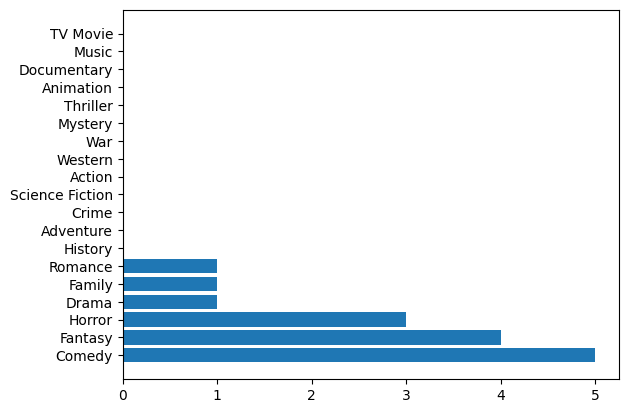

In [60]:
plt.barh(df_genres.columns,df_genres.iloc[0])

In [72]:
%matplotlib inline
decades = [str(i) for i in df["decade"].unique()]
decades = sorted(decades)
tab_contents = decades
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = decades
tab
#https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [83]:
decades = [str(i) for i in df["decade"].unique()]
decades = sorted(decades)

decade_tup = [(item,index + 1) for index, item in enumerate(decades)]

decade_picker = widgets.Dropdown(
    options=decade_tup,
    description="Decade:",
)
decade_picker


Dropdown(description='Decade:', options=(('1890', 1), ('1900', 2), ('1910', 3), ('1920', 4), ('1930', 5), ('19…

In [85]:
plt.barh(df_genres.columns,df_genres.iloc[decade_picker.value])

5
